In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
import requests
import json
import hvplot.pandas
import bokeh
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from config1 import geoapify_key

**Importing Unemployment data capture in the main file**

In [3]:
# read the unemployment data from csv
csv_path = "../output/Unemployment_Rates.csv"

# Import the the data as a df
unemployment_df = pd.read_csv(csv_path)

unemployment_df.head(2)

,Unnamed: 0,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S),Leisure and Hospitality (U),Education and Health Services (U),Financial Activities Industry (U),...,South Dakota (S),Tennessee (S),Texas (S),Utah (S),Vermont (S),Virginia (S),Washington (S),West Virginia (S),Wisconsin (S),Wyoming (S)
0,2018-01-01,4.0,4.5,4.0,4.1,4.6,3.9,6.8,2.7,2.2,...,2.9,3.5,4.1,3.0,3.0,3.3,4.6,5.4,2.9,4.2
1,2018-02-01,4.1,4.4,4.1,4.0,4.6,4.0,6.8,2.5,2.2,...,2.9,3.5,4.0,3.0,2.9,3.2,4.5,5.4,2.9,4.1


**Select from the data the Industries captured in the  Data research and Plot the unemployment rates.**

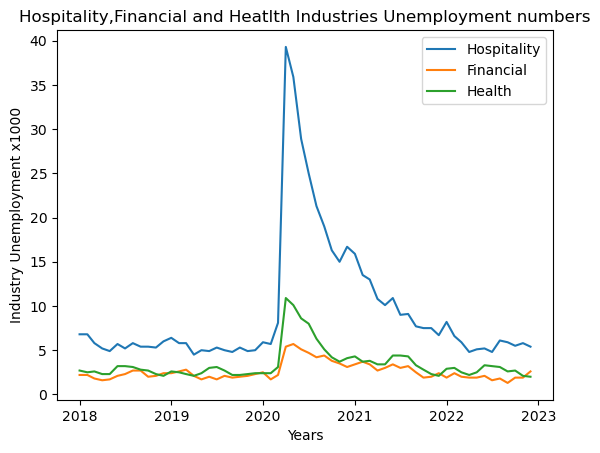

In [4]:
#Creaton of variable  that will be use for the manipulation of the data for the graph
indus_unmp=unemployment_df
indus_unmp['Unnamed: 0']=pd.to_datetime(indus_unmp['Unnamed: 0'])
indus_unmp['month']=(indus_unmp['Unnamed: 0']).dt.month
indus_unmp['year']=(indus_unmp['Unnamed: 0']).dt.year
indus_unmp['period']=indus_unmp['year'].astype(str)  + ' '+indus_unmp['month'].astype(str) 
#Getting the axis data  capture for the graph
x_axis=np.arange(0, len(indus_unmp))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
x=indus_unmp['Unnamed: 0']
y1=indus_unmp['Leisure and Hospitality (U)']
y2=indus_unmp['Financial Activities Industry (U)']
y3=indus_unmp['Education and Health Services (U)']

#Modifiying the labels and title
plt.title("Hospitality,Financial and Heatlth Industries Unemployment numbers")
plt.xlabel("Years")
plt.ylabel("Industry Unemployment x1000")
plt.plot(x,y1,label='Hospitality')
plt.plot(x,y2,label='Financial')
plt.plot(x,y3,label='Health')
plt.legend()
plt.savefig('../output/Industry Unemployment_Rates_2018-2022 linePlot.png', dpi=500)
#print(indus_unmp)

**Looking to the data starting 2020 and creating a graph using another library that make nicer graphs**

In [5]:
#Making sure the format of the date column is correct 
indus_unmp['Unnamed: 0']=pd.to_datetime(indus_unmp['Unnamed: 0'])
#Filtering the dat to start in 2020
indus_unmp2=indus_unmp.loc[indus_unmp['Unnamed: 0']>='1/1/2020']
#plotting
indus_unmp2.hvplot.line(x='Unnamed: 0', y=['Leisure and Hospitality (U)','Education and Health Services (U)','Financial Activities Industry (U)'],by='industry',frame_width = 1000)

:NdOverlay   [Variable]
   :Curve   [Unnamed: 0]   (value)

**Importing data for Lay-off numbers, Source is Keagle site,  format csv**

In [6]:
# read the layoff data from csv
csv_path = "../resource/layoffs.csv"

# Import the the data as a df
original_industry_lay_df = pd.read_csv(csv_path)

original_industry_lay_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Gusto,SF Bay Area,HR,126.0,0.05,2023-02-08,Series E,United States,746.0
1,Gong,SF Bay Area,Sales,80.0,0.07,2023-02-08,Series E,United States,583.0
2,Equitybee,SF Bay Area,Finance,24.0,0.25,2023-02-08,Series B,United States,85.0
3,Affirm,SF Bay Area,Finance,NaN,0.19,2023-02-08,Post-IPO,United States,1500.0
4,Baraja,Sydney,Transportation,NaN,0.75,2023-02-08,Unknown,Australia,63.0


In [7]:
# create a copy of df
industry_lay_df1 = original_industry_lay_df.copy()
# notice that I had NaN values and replace with 0
industry_lay_df=industry_lay_df1.fillna(0) 
#count unique elements
count_location= industry_lay_df.location.nunique() 
count_industry= industry_lay_df.industry.nunique()
count_country= industry_lay_df.country.nunique()

print(f'Unique values for: location {count_location} industry {count_industry} country {count_country}')

#industry_lay_df


Unique values for: location 182 industry 30 country 57


**In a new column labeling the data as (US) and (The rest of the world) Then grouping it for grapth**

In [8]:
#filtering and adding label
industry_lay_df.loc[industry_lay_df['country']=="United States","World"]="US"
industry_lay_df.loc[industry_lay_df['country']!="United States","World"]="Rest of the world"
industry_Group=industry_lay_df
#Making sure the data is significat for the measure selected
industry_Group=industry_lay_df.loc[industry_lay_df['total_laid_off']>0,:]
#Grouping data and sorting
industry_Group_clean=industry_Group.groupby(['World','industry']).sum().sort_values(by = ['total_laid_off'], ascending = False)
df=industry_Group_clean.drop(['percentage_laid_off','funds_raised'],axis=1)
#getting dataframe ready for the graph
df4=df.reset_index()
#print(df4)
#industry_lay_df

In [9]:
# Save graph parameters in to variable, added labels and Title
fig = px.bar(df4,x = 'industry', y = 'total_laid_off', color = 'industry',text_auto='.1s',barmode='relative',hover_data=['World'],
             labels={
                      "industry": "US (Bottom) vs World (Top)",
                      "total_laid_off": "Employees lay-off x 1000"
                      },template="plotly_white")
fig.update_layout(height=500,title="Employees lay-off from 2020 to 2023 Jan")
fig.show()
#saving graph  to png format
fig.write_image("../output/Industry lay off US and World.png")



**Getting ready the df to request Lat Long data for the city**

In [10]:
#Copy of original df
added_list=industry_lay_df
#Grouping data by Country and City
added_list2=added_list.groupby(['location','country']).sum()
#Filtering for cities with Layoff data greatest than 129
added_list3=added_list2.loc[added_list2['total_laid_off']>=129]
addedlist4=added_list3.reset_index()
#Creation of columns for the Lat and the Long
addedlist4["Lat"] = ""
addedlist4["Lon"] = ""
addedlist4
# added_list4.to_csv('resource/lat and long.csv')
# added_list4.dtypes


,location,country,total_laid_off,percentage_laid_off,funds_raised,Lat,Lon
0,Ahmedabad,India,500.0,0.50,200.0,,
1,Amsterdam,Netherlands,17140.0,1.84,28737.0,,
2,Atlanta,United States,1877.0,2.33,4408.0,,
3,Austin,United States,8980.0,6.28,25841.3,,
4,Barcelona,Spain,250.0,0.21,1554.0,,
...,...,...,...,...,...,...,...
89,Vienna,Austria,570.0,0.27,1918.0,,
90,Walldorf,Germany,3000.0,0.03,1300.0,,
91,Washington D.C.,United States,2282.0,2.16,3780.6,,
92,Winnipeg,Canada,350.0,0.00,6.0,,


**API request to capture LAT and LONG from GeoAPIfy*

In [11]:
#API request
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

for index, row in addedlist4.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = row["location"] +","+row['country']
    
      # Add the current city to the parameters
    params["text"] = f"{city}"
    # Make the API request
    response = requests.get(base_url, params=params)

    # Convert reponse to JSON
    response = response.json()

    # Extract latitude and longitude
    addedlist4.loc[index, "Lat"] = response["results"][0]["lat"]
    addedlist4.loc[index, "Lon"] = response["results"][0]["lon"]

   

**WIth the captured data we graph the points capture in a GEO map**

In [12]:
#Potting the data captured as points
world_graph=addedlist4.hvplot.points(
    "Lon",
    "Lat",
    geo="True",
     #tiles = "OSM",
     frame_width = 1000,
    # frame_height = 600 ,
    color='red',
    hover_cols=["total_laid_off","location"],
    scale=1,
     project=False, 
    rasterize=False,  dynamic=False,tiles='StamenTonerBackground',title="2020 -2023 World Lay-off population 'Location'",).opts(
    xlabel='Lat',
    ylabel='Long',
)
hvplot.save(world_graph ,'../output/World main countries layoff numbers.png') #saving file to PNG
world_graph   

#['CartoDark', 'CartoEco', 'CartoLight', 'CartoMidnight', 'EsriImagery', 'EsriNatGeo', 'EsriReference', 'EsriStreet', 'EsriTerrain', 'EsriUSATopo', 'OSM', 'OpenTopoMap', 'StamenLabels', 'StamenLabelsRetina', 'StamenTerrain', 'StamenTerrainRetina', 'StamenToner', 'StamenTonerBackground', 'StamenTonerBackgroundRetina', 'StamenTonerRetina', 'StamenWatercolor', 'Wikipedia

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (total_laid_off,location)

**Map showing in comparative the size of the impact  of the lay-offs around the world.   The size of the graph is intetonally big, so we can see the detail by country**

In [13]:
#Creation of graph were the attribute size provides the proportion of the Layoffs
World_impact_layoff=addedlist4.hvplot.points(
    "Lon",
    "Lat",
    geo="True",
     #tiles = "OSM",
     frame_width = 4000,
    # frame_height = 600 ,
    color=("total_laid_off"), #show different colors base on the layof numbers
    hover_cols=["total_laid_off","location"],
    scale=1,
     project=False, 
    rasterize=False,  dynamic=False,tiles='StamenTonerBackground',title="2020 -2023 World Lay-off population 'Impact'",size='total_laid_off',cmap='viridis').opts(
    xlabel='Lat',
    ylabel='Long',
)
hvplot.save(World_impact_layoff,'../output/US Impact vs world layoff.png') #graph saved in PNG format
World_impact_layoff


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (total_laid_off,location)

**Preparing data to compare by the slected industres**

In [14]:
#Getting the original df as a copy
by_month_lay=industry_lay_df
#this df  I did not use for the project but I will keep it because I'm plannng to add other views 
by_month_lay['date']=pd.to_datetime(by_month_lay['date'])
by_month_lay['month']=(by_month_lay['date']).dt.month
by_month_lay['year']=(by_month_lay['date']).dt.year
#Filtering the df by the industries selected and just the US
similar_ind=by_month_lay.loc[(by_month_lay['industry']=="Food") |(by_month_lay['industry']=="Finance") |(by_month_lay['industry']=="Healthcare")]
similar_indUS=similar_ind.loc[(similar_ind['country']=="United States")]
#deleting columns that I wont be using
similar_indUS_clean=similar_indUS.drop(['percentage_laid_off','funds_raised','company','stage','World','location','month','year'],axis=1)
#Grouping and adding 
similar_indUS_clean2=similar_indUS_clean.groupby(['industry','date']).sum()
similar_indUS_clean2


total_laid_off
industry   date                      
Finance    2020-03-23            13.0
           2020-03-30            51.0
           2020-03-31             0.0
           2020-04-01            50.0
           2020-04-03            35.0
...                               ...
Healthcare 2023-01-27             0.0
           2023-01-30             0.0
           2023-02-01            56.0
           2023-02-02           127.0
           2023-02-05            70.0

[273 rows x 1 columns]

In [15]:
#resetting indexes
similar_indUS_clean2.reset_index(inplace=True)


**Calling back the DF prepared with the Unemplyment data from 2020 forward. To compare Unemployment vs Lay off  US**

In [16]:
indus_unmp2.head()

,Unnamed: 0,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S),Leisure and Hospitality (U),Education and Health Services (U),Financial Activities Industry (U),...,Utah (S),Vermont (S),Virginia (S),Washington (S),West Virginia (S),Wisconsin (S),Wyoming (S),month,year,period
24,2020-01-01,3.5,4.0,3.5,3.5,4.0,3.5,5.9,2.4,2.5,...,2.5,2.5,2.6,3.9,5.1,3.1,4.7,1,2020,2020 1
25,2020-02-01,3.5,3.8,3.4,3.5,3.6,3.5,5.7,2.4,1.7,...,2.6,2.6,2.7,3.9,5.1,3.0,4.9,2,2020,2020 2
26,2020-03-01,4.4,4.5,4.4,4.4,5.9,4.1,8.1,3.1,2.2,...,2.5,2.7,2.9,5.3,5.2,2.9,5.2,3,2020,2020 3
27,2020-04-01,14.7,14.4,16.2,13.5,24.3,12.9,39.3,10.9,5.4,...,10.0,14.3,11.6,16.8,15.5,14.1,5.4,4,2020,2020 4
28,2020-05-01,13.2,13.0,14.5,12.1,19.6,11.9,35.9,10.1,5.7,...,7.6,9.5,9.6,13.2,12.2,10.4,8.6,5,2020,2020 5


In [17]:
#grouping data by date in a year month format. df not use now, it will be further develop
indus_unmp3=indus_unmp2.groupby([indus_unmp2['Unnamed: 0'].dt.year,indus_unmp2['Unnamed: 0'].dt.month])['Leisure and Hospitality (U)'].sum()
#indus_unmp3


**Unemployment data seen from 2020, Below LayOff data in the same period of time**

In [18]:
#creation of graph for three industries
unemployment_US_grapgh=indus_unmp2.hvplot.line(x='Unnamed: 0', y=['Financial Activities Industry (U)','Leisure and Hospitality (U)','Education and Health Services (U)'],
frame_width = 1000,legend='top_right',colorbar=True).opts(
    title='Unemployment (x1000) United States for specific industries',
    xlabel='2020 - 2023',
    ylabel='Thousands',
)
hvplot.save(unemployment_US_grapgh,'../output/Unemployment_graph 2020 2022v2.png')
unemployment_US_grapgh

:NdOverlay   [Variable]
   :Curve   [Unnamed: 0]   (value)

In [19]:
#graph for Lay-offs in the US for three comparable Industries
layoff_graph=similar_indUS_clean2.hvplot.line(x='date', y='total_laid_off',by='industry',frame_width = 1000,stacked=True,legend='top_left',colorbar=True).opts(
    title='Lay-off People (x100)) United States,  for specific industries',
    xlabel='2020 - 2023',
    ylabel='Hundreds',
)

hvplot.save(layoff_graph,'../output/layoff_graph.png')
layoff_graph

:NdOverlay   [industry]
   :Curve   [date]   (total_laid_off)